<a href="https://colab.research.google.com/github/Yasaman8875/ImageDeep/blob/main/DeepImage_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


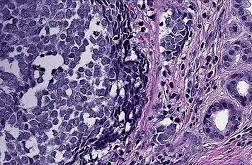

In [3]:
import cv2
from google.colab.patches import cv2_imshow
input_image =cv2.imread('1.jpg')
cv2_imshow(input_image)

In [10]:
height,width= input_image.shape[0:2]
print('height',height)
print('width',width)


height,width,channel= input_image.shape
print('height',height)
print('width',width)
print('channel',channel)
print('size:',input_image,size)
print('size:',input_image,shape)

height 165
width 252
height 165
width 252
channel 3


NameError: ignored

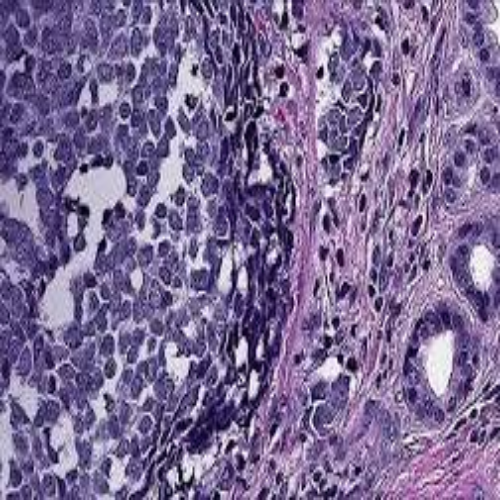

In [12]:
resized_image = cv2.resize(input_image,(500,500))
cv2_imshow(resized_image)

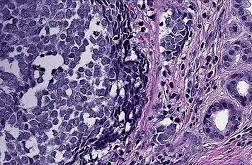

In [18]:
resized_image = cv2.resize(input_image,(0,0), fx=1, fy=1)
cv2_imshow(resized_image)

In [16]:
height,width= resized_image.shape[0:2]
print('height',height)
print('width',width)

height 41
width 63


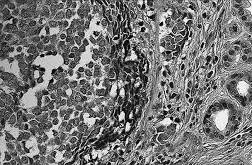

In [19]:
from IPython.core.display import Image
image_2=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image_2)

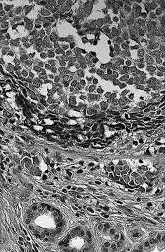

In [23]:
image_2=cv2.rotate(image_2,cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(image_2)

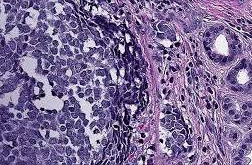

In [25]:
flipvertical=cv2.flip(resized_image,0)
cv2_imshow(flipvertical)

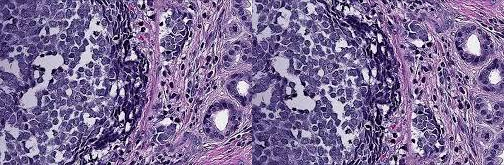

In [27]:
final=cv2.hconcat((input_image,flipvertical))
cv2_imshow(final)

In [31]:
pixel=resized_image[150,150]
print(pixel)

[214 175 201]


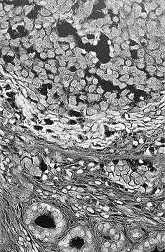

In [32]:
image_3=255- image_2
cv2_imshow(image_3)

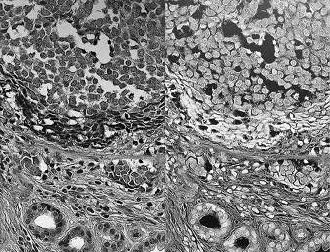

In [33]:
final=cv2.hconcat((image_2,image_3))
cv2_imshow(final)

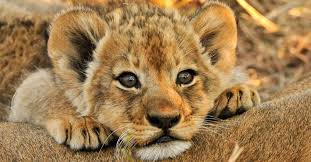

In [41]:
import cv2
from google.colab.patches import cv2_imshow
img =cv2.imread('Image.jpg')
cv2_imshow(img)

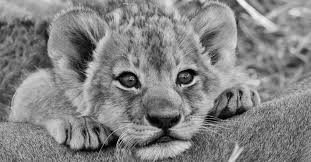

In [42]:
img=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [38]:
import matplotlib.pyplot as plt
import numpy as np


In [48]:
import matplotlib.pyplot as plt
import numpy  as  np
def applylogTransform(img) :
  hist_image =cv2.calcHist([img],[0],None,[256],[0,256])
  img_log=(np.log(img+1)/(np.log(1+np.max(img))))*255
  img_log = np.array(img_log,dtype=np.unit8)
  hist_img_log = cv2.calcHist([img_log],[0],None,[255],[0,256])

  plt.figure(figsize=(20,10))
  plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('orginal Img',color='c')
  plt.subplot(222),plt.plot(hist_image),plt.title('Hostogram :Before ',color ='c')
  plt.subplot(223),plt.imshow(img,cmap='gray'),plt.title('Logtransform',color='c')
  plt.subplot(224),plt.plot(hist_image),plt.title('Hostogram :After ',color ='c')
  plt.show()
  return

In [49]:
applylogTransform(img)

AttributeError: ignored

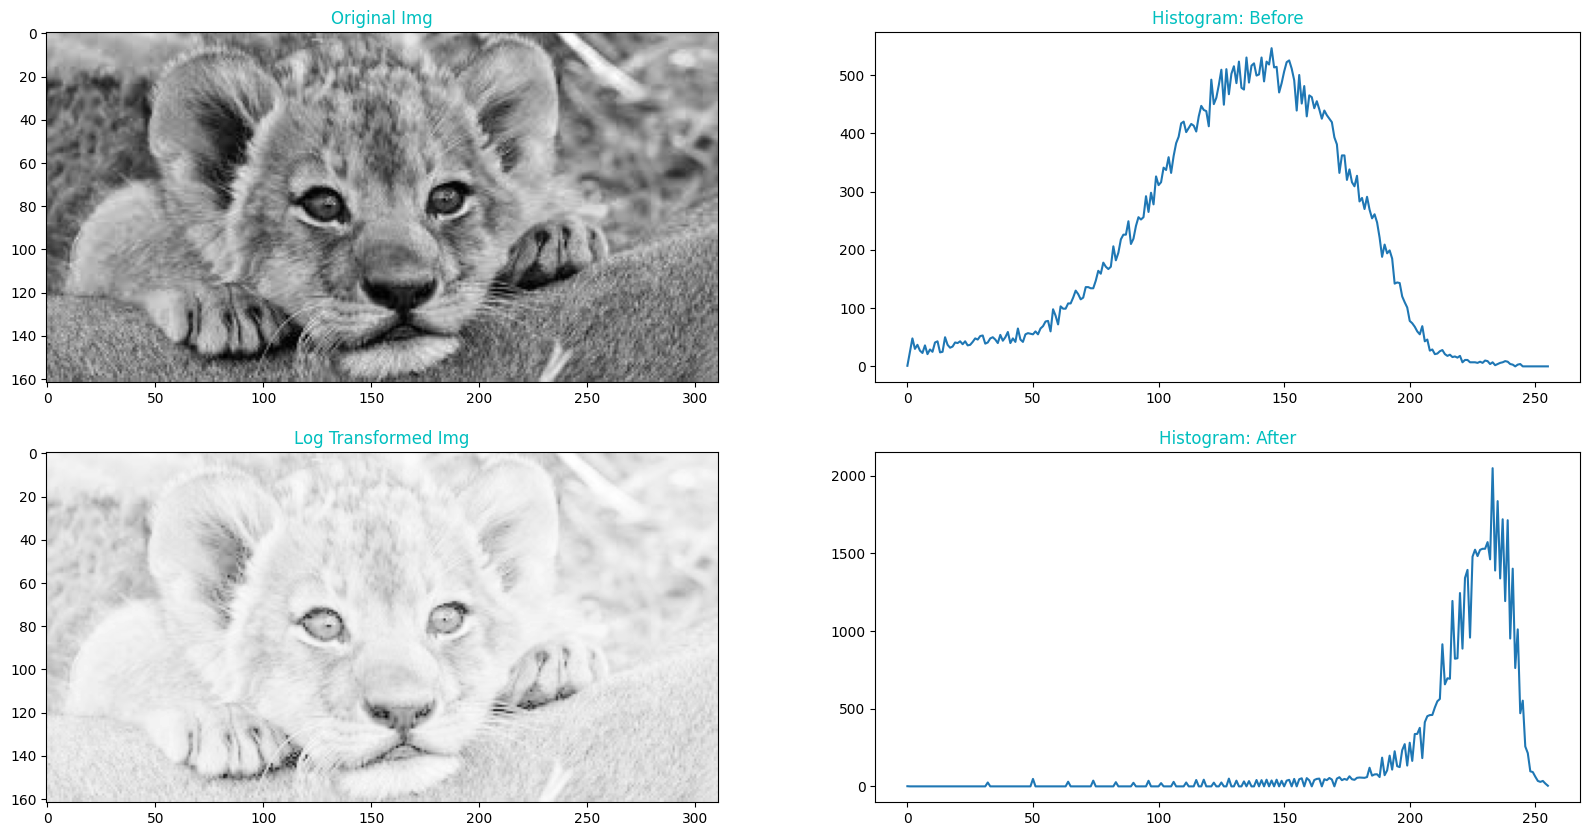

In [47]:

def applyLogTransform(img):
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
    img_log = np.array(img_log,dtype=np.uint8)
    hist_img_log = cv2.calcHist([img_log],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(img_log,cmap='gray'),plt.title('Log Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_log),plt.title('Histogram: After',color='c')
    plt.show()
    return

applyLogTransform(img)

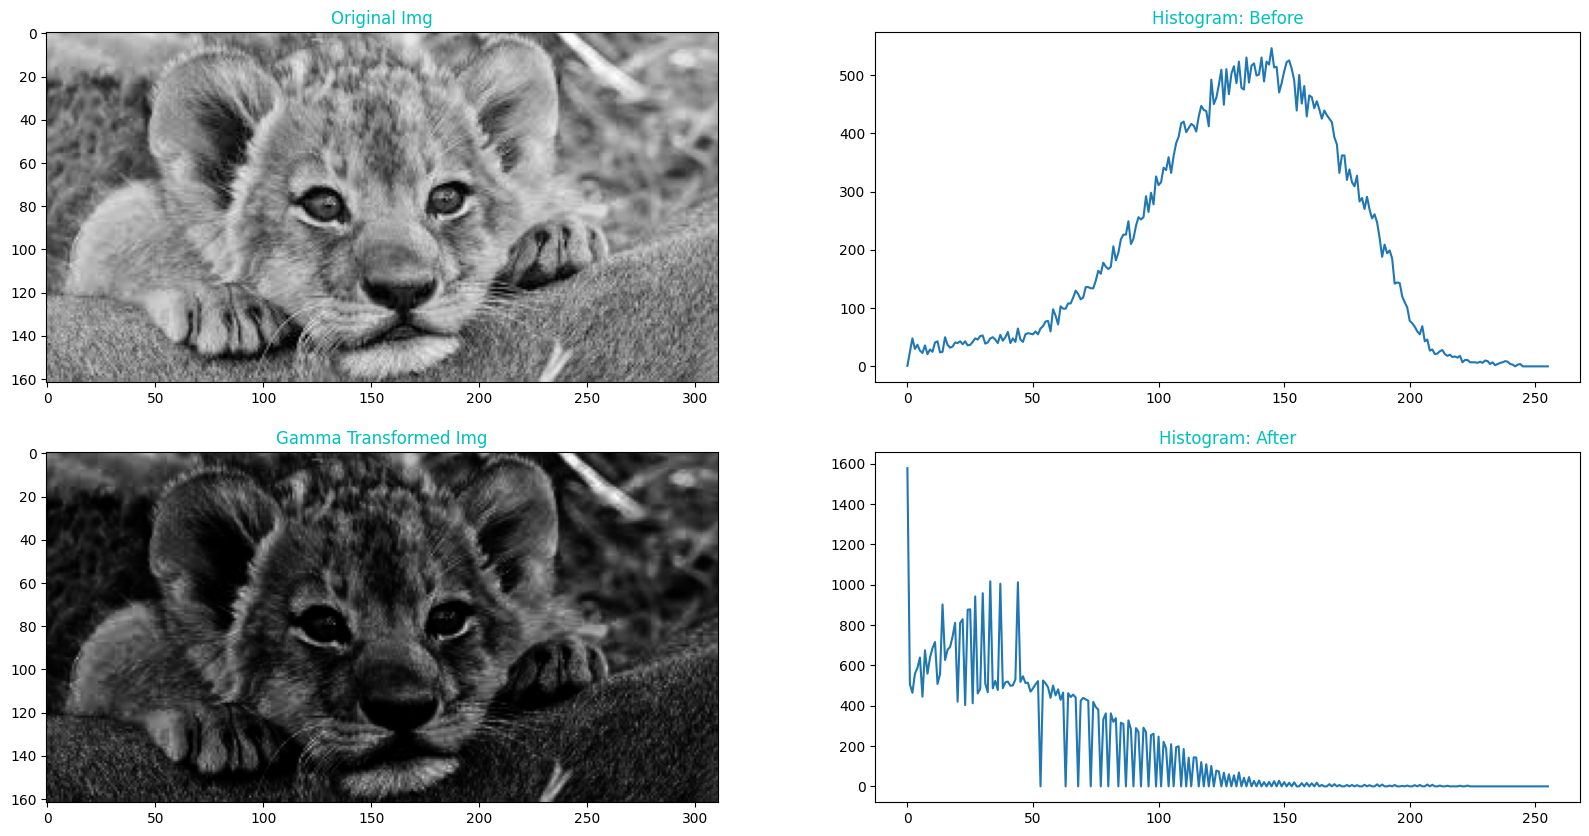

In [50]:
gamma_vals = [0.1, 0.5, 1.2, 2.2]

def applyGammaTransform(img,gamma_val=None):
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    gamma_corrected = np.array(255*(img / 255) ** gamma_val, dtype = 'uint8')
    hist_img_gamma = cv2.calcHist([gamma_corrected],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(gamma_corrected,cmap='gray'),plt.title('Gamma Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_gamma),plt.title('Histogram: After',color='c')
    plt.show()
    return

applyGammaTransform(img,gamma_val=3.0)

In [51]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im_result = histeq(im_gray)
cv2_imshow(im_result)

NameError: ignored

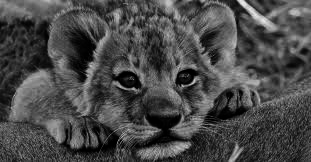

In [52]:
im_gray = 255.0*(img/255.0)**2
cv2_imshow(im_gray)

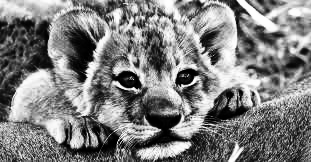

In [53]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im_result = histeq(im_gray)
cv2_imshow(im_result)

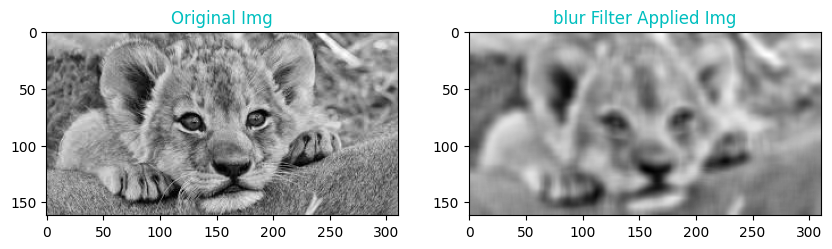

In [54]:
def applyFilter(img,func_filter=None,kernel_len=None):
    if img is None:
        print('Unable to Read Image. Check you gave right path')
        return -1
    if func_filter == 'blur':
        img_fltr = cv2.blur(img,(kernel_len,kernel_len))
    if func_filter ==  'gaussian':
        img_fltr = cv2.GaussianBlur(img,(kernel_len,kernel_len),0)
    if func_filter == 'median':
        #kernal_len should be odd and greater than 1
        img_fltr = cv2.medianBlur(img,kernel_len)
    if func_filter == 'bilateral':
        img_fltr = cv2.bilateralFilter(img,kernel_len,kernel_len*2,kernel_len*2)
    if func_filter == 'arbitary':
        img_fltr =  cv2.filter2D(img,-1,kernel_len)

    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(122),plt.imshow(img_fltr,cmap='gray'),plt.title((func_filter+' Filter Applied Img'),color='c')
    return

applyFilter(img,func_filter='blur',kernel_len=10)

In [55]:
# import the necessary packages
from skimage.exposure import rescale_intensity
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [56]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [57]:
def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")

	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

			# perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
			k = (roi * kernel).sum()

			# store the convolved value in the output (x,y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k

	# rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")

	# return the output image
	return output

In [58]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# construct a sharpening filter
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

In [59]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [60]:
# construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convole` function and
# OpenCV's `filter2D` function
kernelBank = (
	("small_blur", smallBlur),
	("large_blur", largeBlur),
	("sharpen", sharpen),
	("laplacian", laplacian),
	("sobel_x", sobelX),
	("sobel_y", sobelY)
)

[INFO] applying small_blur kernel


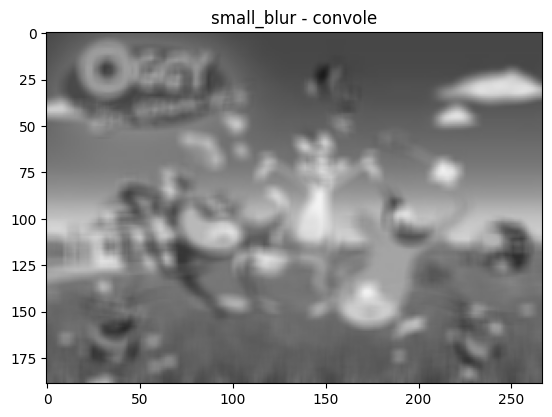

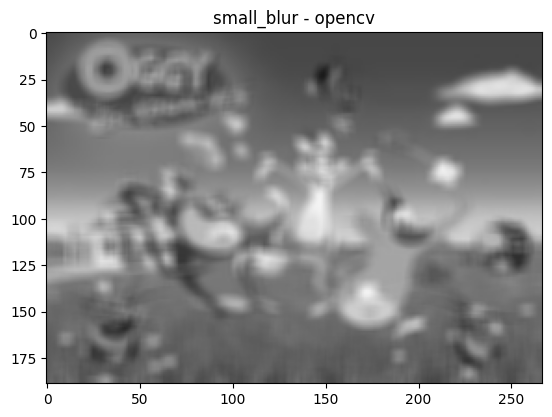

[INFO] applying large_blur kernel


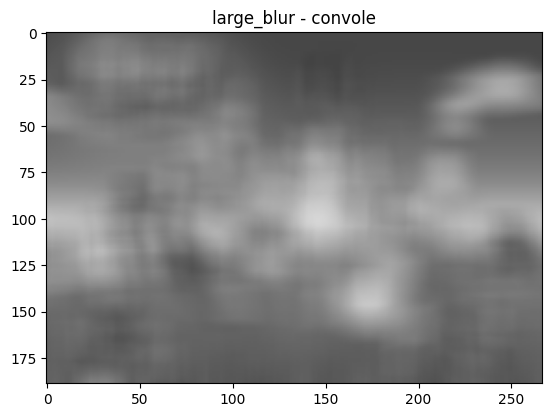

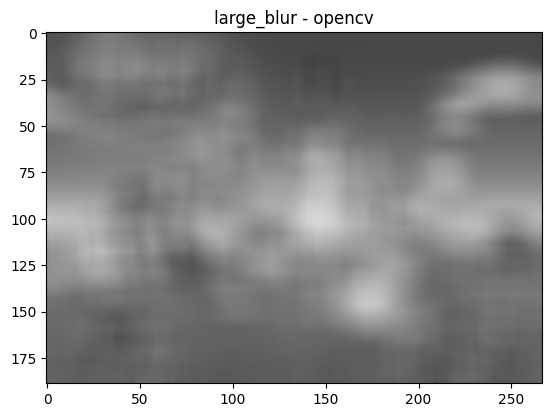

[INFO] applying sharpen kernel


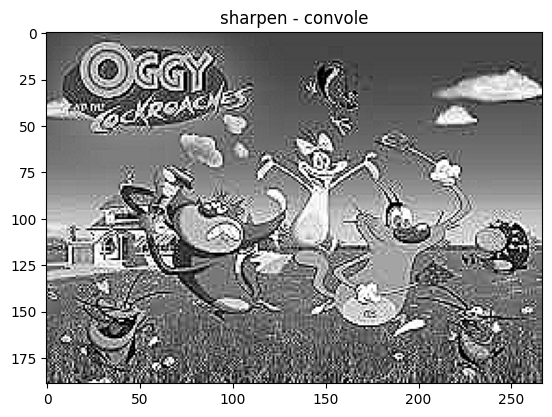

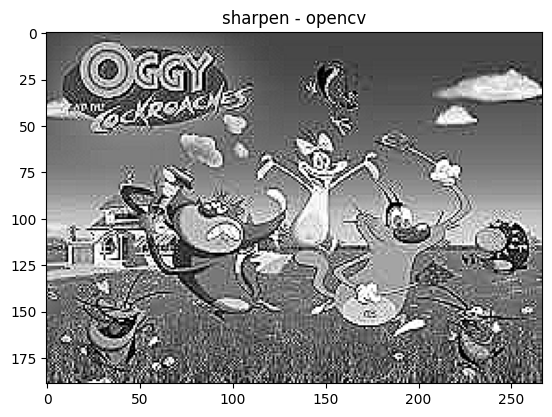

[INFO] applying laplacian kernel


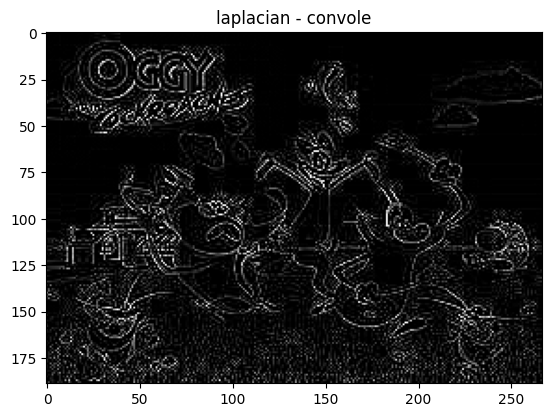

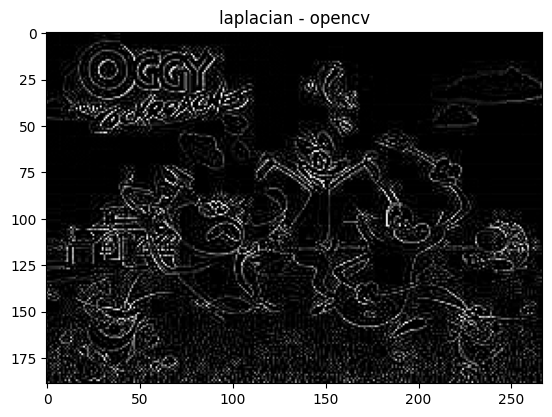

[INFO] applying sobel_x kernel


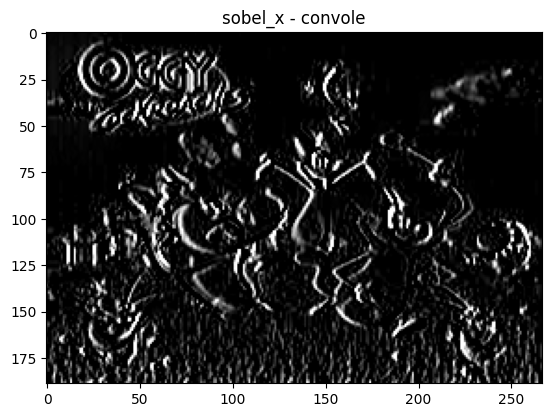

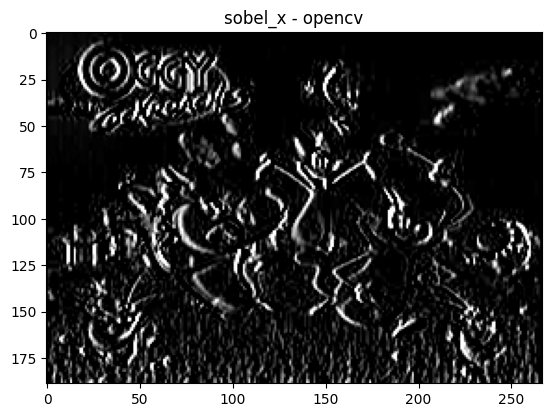

[INFO] applying sobel_y kernel


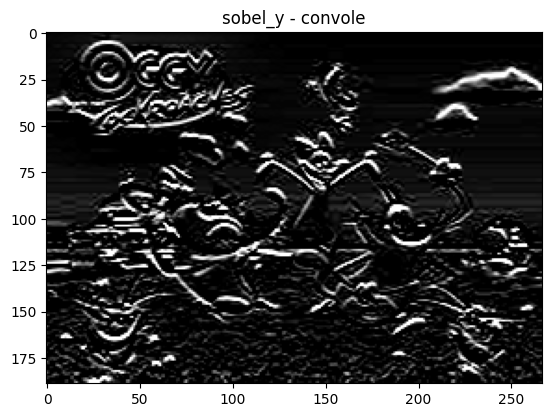

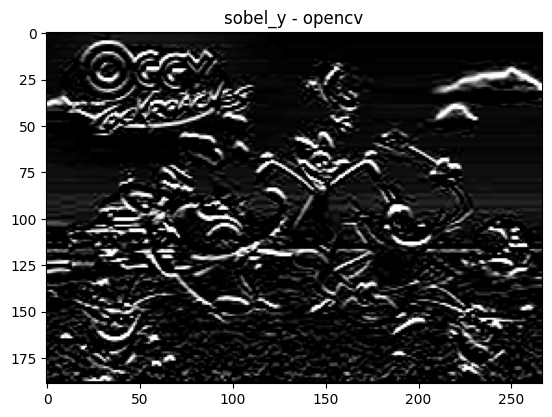

In [63]:
# load the input image and convert it to grayscale
image = cv2.imread('oggy.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# loop over the kernels
for (kernelName, kernel) in kernelBank:
	# apply the kernel to the grayscale image using both
	# our custom `convole` function and OpenCV's `filter2D`
	# function
	print("[INFO] applying {} kernel".format(kernelName))
	convoleOutput = convolve(gray, kernel)
	opencvOutput = cv2.filter2D(gray, -1, kernel)

	# show the output images

	plt_imshow("{} - convole".format(kernelName), convoleOutput)
	plt_imshow("{} - opencv".format(kernelName), opencvOutput)

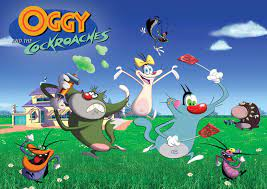

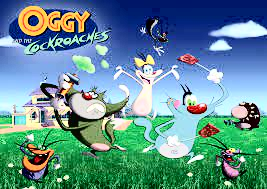

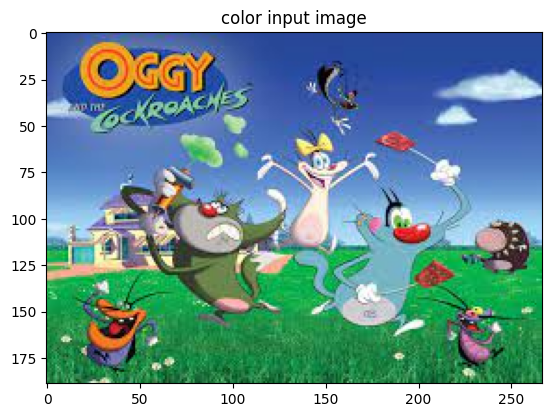

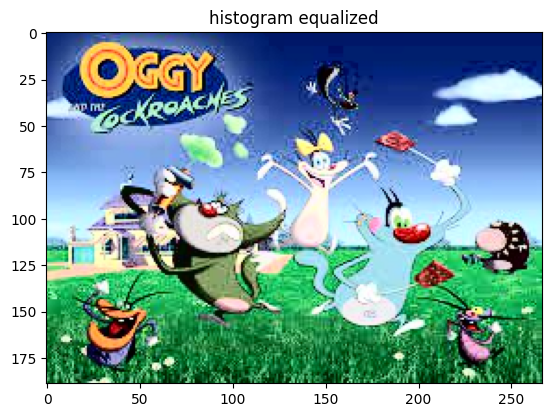

In [68]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('oggy.jpeg')

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2_imshow(img)
cv2_imshow( img_output)

cv2.waitKey(0)

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


plt_imshow("color input image", img)
plt_imshow("histogram equalized", img_output)